In [8]:
import glob, os
import numpy as np
import cv2
import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import shutil
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras import backend
from keras.preprocessing import image


face_cascade = cv2.CascadeClassifier()

In [9]:
classifier = Sequential()
classifier.add(Conv2D(64, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 16, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.load_weights('C:/model_23_ep.h5')

In [10]:
img = cv2.imread(r'C:\Users\Nyx\dataset\foto3.jpg')
imgnf = img.copy()
img=cv2.resize(img,(int(img.shape[1]/1),int(img.shape[0]/1)))
#img=cv2.resize(img,(int(img.shape[1]/2),int(img.shape[0]/2)))
#img=cv2.resize(img,(int(img.shape[1]/4),int(img.shape[0]/4)))
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

%time
start = datetime.datetime.now()
faces = face_cascade.detectMultiScale(grey, 1.05, 5)
end = datetime.datetime.now()
elapsed = end - start
print(grey.shape)
print(elapsed.seconds,":",elapsed.microseconds) 
print(len(faces))

Wall time: 0 ns
(920, 1544)
1 : 453228
30


In [11]:
#for i in range(len(faces)):
#    print("Muka "+str(i)+" "+str(faces[i]))

In [12]:
%time
start = datetime.datetime.now()
faces = face_cascade.detectMultiScale(grey, 1.05, 5)


# Iterasi seluruh ROI yang kedetek
faces_yang_baru = []
for (x,y,w,h) in faces:
    roi = img[y:y+h, x:x+w]
    #roi diresize ke 64x64
    lol = cv2.resize(roi, (64,64))
    #image to tensor
    lol = image.img_to_array(lol)
    # (w,h) -> (w,h,c) w= width, h = tinggi, c = color
    lol = np.expand_dims(lol, axis = 0)
    #roi gadifilter cnn
    cv2.rectangle(imgnf,(x, y), (x+w, y+h), (0, 255, 0), 2)
    #cv2.imwrite(r'C:/Users/Nyx/Desktop/DRAW NEW/output/'+'test_haar'+".jpg",imgnf)
    result = classifier.predict_classes(lol)

    #ini bikin roi kalo orang
    if 1 == result[0][0]:
        faces_yang_baru.append([x, y, w, h])
        cv2.rectangle(img,(x, y), (x+w, y+h), (0, 255, 0), 2)
        #cv2.imwrite(r'C:/Users/Nyx/Desktop/DRAW NEW/output/'+'test_cnn'+".jpg",img)
        
      
end = datetime.datetime.now()
elapsed = end - start
print(elapsed.seconds,":",elapsed.microseconds) 
print(len(faces_yang_baru))


Wall time: 0 ns
1 : 557644
26


# Filter CNN

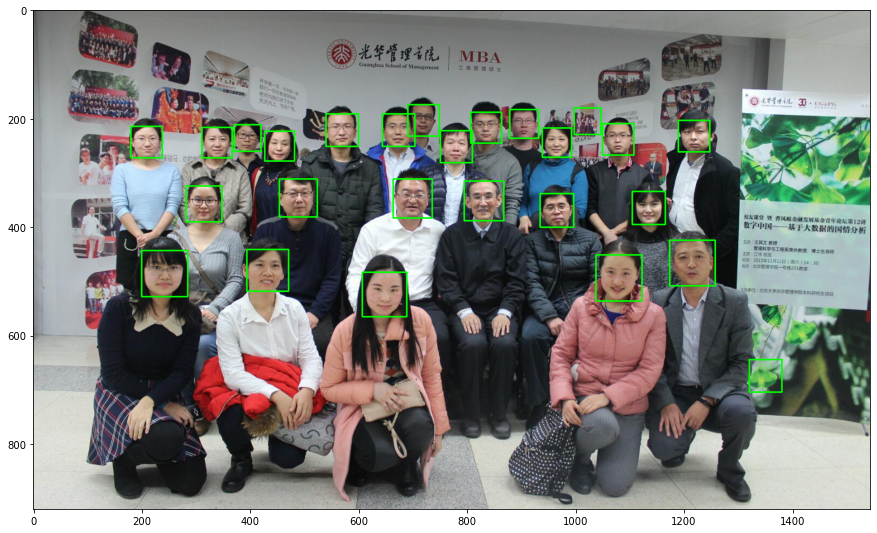

In [13]:
plt.figure(figsize=(15,10))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

# Haar

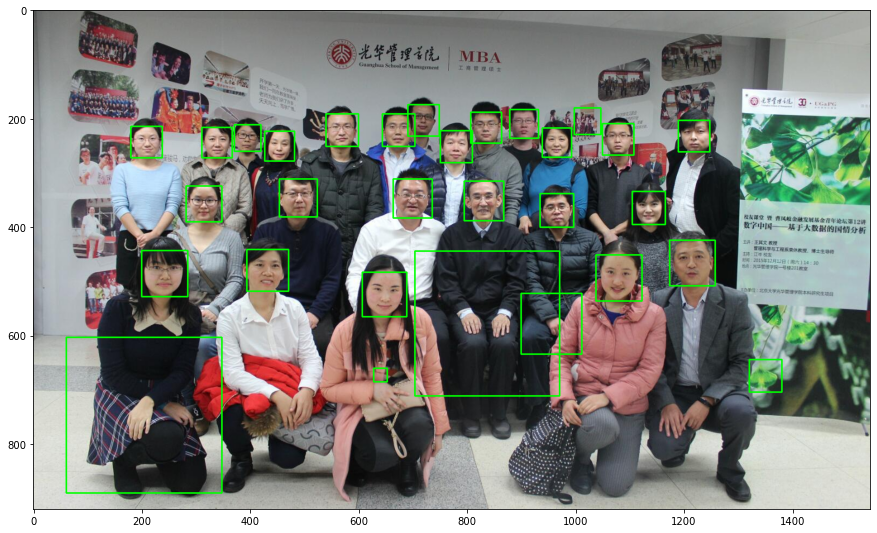

In [14]:
plt.figure(figsize=(15,10))
img_rgb = cv2.cvtColor(imgnf, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)